<a href="https://colab.research.google.com/github/aritrasen87/LLM_From_Scratch/blob/main/1_LLM_From_Scratch_PytorchEssentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch Essentials for Buildilng LLM from Scratch - https://www.youtube.com/@AritraSen

Deep learning with Pytorch: https://youtube.com/playlist?list=PLOrU905yPYXJsJSHJsiE779KfcrRCgz4v&si=kMm_xrDwfKF9mVCk

# **Build LLM from Scratch**

1. **Pytorch Essentials**
2. Tokenization and Data Preparation for LLM
3. Decoder based LLM Archietecture Building
4. LLM Pretraining

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
tensor1 = torch.randn(4, 5)
tensor2 = torch.randn(5, 4)

In [ ]:
tensor1.shape , tensor2.shape

(torch.Size([4, 5]), torch.Size([5, 4]))

In [ ]:
print(tensor1)

tensor([[-0.5052,  0.0696,  0.3811, -1.0432, -1.8870],
        [-0.3648,  1.0843, -0.5075, -0.6726,  0.6484],
        [-1.1391, -0.9684,  0.1949, -0.4022,  0.1019],
        [-0.5731,  1.8145,  1.1503,  0.8639, -0.1164]])


In [ ]:
print(tensor2)

tensor([[-0.1066,  0.9748, -1.2744, -0.2056],
        [-0.9056,  1.1066,  0.1553,  0.4427],
        [-1.0844,  0.2307, -0.7648,  1.8045],
        [-0.6907, -1.0077,  0.5109, -1.6123],
        [-0.0590,  0.1446, -0.5474, -1.9317]])


### Dot Product

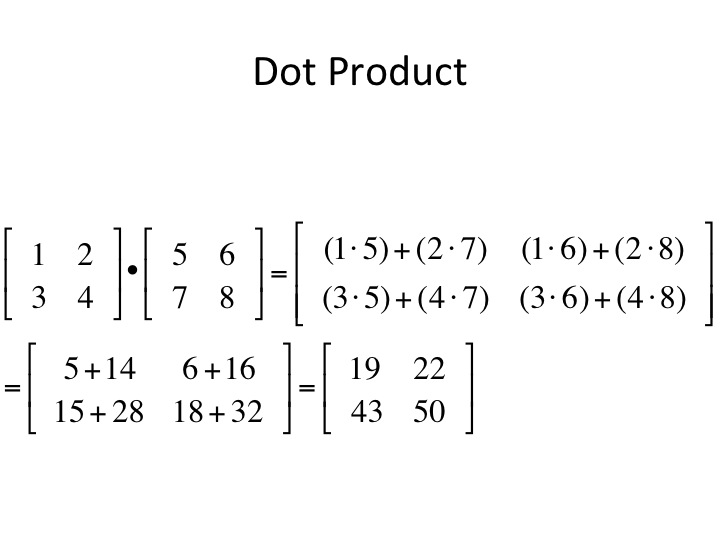

In [ ]:
tensor3 = tensor1 @ tensor2
print(tensor3)

tensor([[ 0.4095,  0.4509,  0.8631,  6.1494],
        [ 0.0336,  1.4988,  0.3229, -0.5290],
        [ 1.0589, -1.7170,  0.8910,  0.6088],
        [-3.4194,  0.8273,  0.6376,  1.8289]])


In [ ]:
torch.matmul(tensor1,tensor2)

tensor([[ 0.4095,  0.4509,  0.8631,  6.1494],
        [ 0.0336,  1.4988,  0.3229, -0.5290],
        [ 1.0589, -1.7170,  0.8910,  0.6088],
        [-3.4194,  0.8273,  0.6376,  1.8289]])

### Concatination

In [ ]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([4])
torch.cat((t1,t2),dim=0)

tensor([1, 2, 3, 4])

In [ ]:
tensor1

tensor([[-0.5052,  0.0696,  0.3811, -1.0432, -1.8870],
        [-0.3648,  1.0843, -0.5075, -0.6726,  0.6484],
        [-1.1391, -0.9684,  0.1949, -0.4022,  0.1019],
        [-0.5731,  1.8145,  1.1503,  0.8639, -0.1164]])

In [3]:
t_cat = torch.cat((tensor1,tensor1),dim=0)
print(t_cat)
print(f'Shape of cat:{t_cat.shape}')

tensor([[ 0.5872, -1.5678,  0.4767,  0.4996, -0.6462],
        [ 1.9249, -0.2682,  0.5508,  0.5285, -0.8732],
        [ 0.9257, -0.0835, -0.2427, -1.2313, -0.4686],
        [ 2.0819, -0.0305, -2.9880, -1.1059,  0.7760],
        [ 0.5872, -1.5678,  0.4767,  0.4996, -0.6462],
        [ 1.9249, -0.2682,  0.5508,  0.5285, -0.8732],
        [ 0.9257, -0.0835, -0.2427, -1.2313, -0.4686],
        [ 2.0819, -0.0305, -2.9880, -1.1059,  0.7760]])
Shape of cat:torch.Size([8, 5])


In [4]:
t_stack = torch.stack([tensor1,tensor1])
print(t_stack)
print(f'Shape of cat:{t_stack.shape}')

tensor([[[ 0.5872, -1.5678,  0.4767,  0.4996, -0.6462],
         [ 1.9249, -0.2682,  0.5508,  0.5285, -0.8732],
         [ 0.9257, -0.0835, -0.2427, -1.2313, -0.4686],
         [ 2.0819, -0.0305, -2.9880, -1.1059,  0.7760]],

        [[ 0.5872, -1.5678,  0.4767,  0.4996, -0.6462],
         [ 1.9249, -0.2682,  0.5508,  0.5285, -0.8732],
         [ 0.9257, -0.0835, -0.2427, -1.2313, -0.4686],
         [ 2.0819, -0.0305, -2.9880, -1.1059,  0.7760]]])
Shape of cat:torch.Size([2, 4, 5])


### nn.Multinomial

In [ ]:
# torch.multinomial(input, num_samples, replacement=False, *, generator=None, out=None) → LongTensor

# Parameters:
    # input (Tensor) – the input tensor containing probabilities

    # num_samples (int) – number of samples to draw

    # replacement (bool, optional) – whether to draw with replacement or not

# each probability points to the index of the probability in the tensor
probabilities = torch.tensor([0.1, 0.4 , 0.5]) # 10% => 0, 40%=> 1 , 50% for 2

samples = torch.multinomial(probabilities, num_samples=10, replacement=True)
print(samples)

tensor([1, 2, 1, 1, 2, 1, 2, 2, 1, 1])


### Trail Matrix

Returns the lower triangular part of the matrix (2-D tensor) or batch of matrices input, the other elements of the result tensor out are set to 0.

In [5]:
print(tensor1)

tensor([[ 0.5872, -1.5678,  0.4767,  0.4996, -0.6462],
        [ 1.9249, -0.2682,  0.5508,  0.5285, -0.8732],
        [ 0.9257, -0.0835, -0.2427, -1.2313, -0.4686],
        [ 2.0819, -0.0305, -2.9880, -1.1059,  0.7760]])


In [6]:
print(torch.tril(tensor1))

tensor([[ 0.5872,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.9249, -0.2682,  0.0000,  0.0000,  0.0000],
        [ 0.9257, -0.0835, -0.2427,  0.0000,  0.0000],
        [ 2.0819, -0.0305, -2.9880, -1.1059,  0.0000]])


In [ ]:
tensor1.shape

torch.Size([4, 5])

In [ ]:
out = tensor1.masked_fill(torch.tril(torch.ones(4, 5)) == 0, float('-inf'))
out

tensor([[-0.5052,    -inf,    -inf,    -inf,    -inf],
        [-0.3648,  1.0843,    -inf,    -inf,    -inf],
        [-1.1391, -0.9684,  0.1949,    -inf,    -inf],
        [-0.5731,  1.8145,  1.1503,  0.8639,    -inf]])

### Transpose

In [ ]:
t3 = torch.rand(2,3,4)
t3.shape

torch.Size([2, 3, 4])

In [ ]:
t3

tensor([[[0.9387, 0.0717, 0.7192, 0.0798],
         [0.5136, 0.3794, 0.2516, 0.1496],
         [0.0974, 0.5239, 0.0963, 0.2048]],

        [[0.1060, 0.1647, 0.8310, 0.5854],
         [0.9952, 0.8251, 0.1153, 0.1378],
         [0.3005, 0.8768, 0.2380, 0.1228]]])

In [ ]:
t3.transpose(0,1).shape

torch.Size([3, 2, 4])

### nn.Embedding

In [ ]:
# Initialize an embedding layer
vocab_size = 50
embedding_dim = 100
embedding = nn.Embedding(vocab_size, embedding_dim)

# Create some input indices
input_indices = torch.LongTensor([1, 0, 5]) #LLM from scratch

# Apply the embedding layer
embedded_output = embedding(input_indices)

print(embedded_output.shape)  # no of tokens * embedding dimension

torch.Size([3, 100])


In [ ]:
print(embedded_output[0].shape)

torch.Size([100])


# RegisterBuffer

In [ ]:
class MaskedHead(nn.Module):
    """ One masked self attention head """
    def __init__(self, head_size):
        super().__init__()
        self.w_query = nn.Linear(n_embd , head_size , bias=False)
        self.w_key = nn.Linear(n_embd , head_size , bias=False)
        self.w_value = nn.Linear(n_embd , head_size, bias=False)

        #self.register_buffer('tril',torch.tril(torch.ones(block_size,block_size)))
        self.mask = torch.tril(torch.ones(block_size, block_size), diagonal=1)


        self.dropout = nn.Dropout(drop_out)

    def forward(self,x):

        print(f'MMH , x shape{x.shape}')

        B,T,D = x.shape

        q = self.w_query(x)
        k = self.w_key(x)
        v = self.w_value(x)

        wei = q @ k.transpose(-2 , -1) * k.shape[-1]**-0.5
        wei = wei.masked_fill(self.mask[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim = -1)
        wei = self.dropout(wei)
        out = wei @ v

        return out

In [ ]:
torch.manual_seed(100)

inputs = torch.rand(6,5)

batch = torch.stack((inputs, inputs), dim=0)
block_size = batch.shape[1]
n_embd = inputs.shape[1]

head_size = 64

drop_out = 0.1

In [ ]:
print(n_embd)
print(head_size)

5
64


In [ ]:
Masked_without_buffer = MaskedHead(head_size)

with torch.no_grad():
    context_vecs = Masked_without_buffer(batch)

print(context_vecs)

MMH , x shapetorch.Size([2, 6, 5])
tensor([[[-2.8405e-02,  1.4376e-01, -9.9015e-02, -1.8295e-01,  3.0590e-01,
          -9.4967e-03,  6.7290e-02, -3.9946e-01, -5.7709e-01,  3.4139e-01,
           1.6032e-02, -7.1096e-02,  5.6491e-01,  2.2933e-01,  1.6770e-01,
           1.2671e-01,  1.7895e-01, -3.7584e-02, -5.3722e-02, -3.3519e-02,
           1.0927e-02, -2.7048e-01,  5.5251e-02,  3.2146e-01, -8.0959e-03,
          -8.2708e-02, -6.6841e-02, -1.9353e-01,  1.5847e-01,  1.1592e-01,
           2.9076e-01, -9.7154e-02, -7.7488e-02,  1.8323e-01, -1.6009e-01,
          -3.1393e-01,  9.9828e-02, -4.4461e-01,  4.0745e-01,  1.8787e-02,
           6.7223e-02, -3.4792e-02, -5.5663e-02, -1.9362e-01, -2.8038e-01,
          -9.9853e-02,  1.7589e-01, -1.6521e-01, -3.4372e-01, -2.6263e-01,
          -1.1766e-01,  4.8308e-02,  5.4942e-02,  3.7899e-01, -3.9429e-01,
           3.5823e-01, -1.0223e-01,  5.4895e-01, -3.0139e-01, -1.6646e-01,
           2.8152e-01,  2.7729e-01,  9.7563e-02, -5.5784e-02],
  

In [ ]:
### Move the model and batch to GPU

batch = batch.to(device)
Masked_without_buffer.to(device);

with torch.no_grad():
    context_vecs = Masked_without_buffer(batch)

print(context_vecs)

MMH , x shapetorch.Size([2, 6, 5])


RuntimeError: expected self and mask to be on the same device, but got mask on cpu and self on cuda:0

In [ ]:
print("w_query's device:", Masked_without_buffer.w_query.weight.device)
print("w_key's device:", Masked_without_buffer.w_key.weight.device)
print("w_value's device:", Masked_without_buffer.w_value.weight.device)
print("mask's device:", Masked_without_buffer.mask.device)

w_query's device: cuda:0
w_key's device: cuda:0
w_value's device: cuda:0
mask's device: cpu


In [ ]:
class MaskedHead(nn.Module):
    """ One masked self attention head """
    def __init__(self, head_size):
        super().__init__()
        self.w_query = nn.Linear(n_embd , head_size , bias=False)
        self.w_key = nn.Linear(n_embd , head_size , bias=False)
        self.w_value = nn.Linear(n_embd , head_size, bias=False)

        self.register_buffer('tril',torch.tril(torch.ones(block_size,block_size)))
        #self.mask = torch.triu(torch.ones(block_size, block_size), diagonal=1)


        self.dropout = nn.Dropout(drop_out)

    def forward(self,x):

        print(f'MMH , x shape{x.shape}')

        B,T,D = x.shape

        q = self.w_query(x)
        k = self.w_key(x)
        v = self.w_value(x)

        wei = q @ k.transpose(-2 , -1) * k.shape[-1]**-0.5
        #wei = wei.masked_fill(self.mask[:T, :T] == 0, float('-inf'))
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))
        wei = F.softmax(wei, dim = -1)
        wei = self.dropout(wei)
        out = wei @ v

        return out

In [ ]:
### Initialize the model again

Masked_with_buffer = MaskedHead(head_size)

### Move the model and batch to GPU

batch = batch.to(device)
Masked_with_buffer.to(device);

with torch.no_grad():
    context_vecs = Masked_with_buffer(batch)

print(context_vecs)

MMH , x shapetorch.Size([2, 6, 5])
tensor([[[-1.2173e-01, -2.3865e-01, -2.2987e-01,  2.0274e-01, -1.7669e-01,
           1.4680e-01, -4.8870e-01,  4.9394e-02, -2.8143e-01, -2.7290e-02,
          -2.6407e-01, -1.1670e-01,  2.9807e-01, -2.3353e-01, -3.2353e-01,
           3.8558e-01,  5.7987e-01, -3.7832e-02, -1.0542e-01,  7.7300e-01,
           2.0348e-01, -9.5054e-01,  1.2327e-01,  2.3186e-01, -3.9382e-01,
           9.2293e-02,  5.8114e-02,  1.4911e-01,  3.4933e-01, -1.8365e-01,
          -3.5265e-02, -1.3517e-01,  7.7951e-01,  4.3207e-01,  3.6084e-01,
           2.0901e-02,  6.2128e-01, -5.1342e-01, -5.6163e-01, -1.5253e-01,
          -2.7629e-02,  1.6029e-03, -2.6663e-01, -2.0503e-01,  2.7986e-01,
          -2.5866e-01,  1.2962e-01, -3.1527e-01, -2.2545e-01,  9.1799e-01,
          -3.1127e-01, -2.4858e-02,  8.6299e-02,  3.2788e-01,  2.5509e-01,
           5.9667e-01,  1.7422e-02, -4.4825e-03, -2.6015e-01,  8.8944e-02,
           2.1821e-01,  8.7226e-01, -1.7555e-01, -2.1152e-01],
  